## Import Library

In [ ]:
import kagglehub
import shutil
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
# Download dataset
path = kagglehub.dataset_download("bhavikjikadara/retail-transactional-dataset")

# Tentukan direktori tujuan (folder tempat file .ipynb dijalankan)
target_dir = os.getcwd()

# Salin semua isi dataset ke direktori aktif
for item in os.listdir(path):
    src = os.path.join(path, item)
    dst = os.path.join(target_dir, item)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)

print("Dataset tersimpan di direktori kerja:", target_dir)


100%|██████████| 24.8M/24.8M [02:25<00:00, 179kB/s] 

Extracting files...


Dataset tersimpan di direktori kerja: d:\KULIAH\Semester 7\ASAH\TIM CAPSTONE\[ASAH] Capstone Project


In [6]:
df = pd.read_csv('retail_data.csv')

## Preprocessing Data

### Info

In [7]:
print("=== Informasi Dataset ===")
print(df.info())
print("\nJumlah baris dan kolom:", df.shape)

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64

### Feature Extraction

In [ ]:
selected_features = [
    'Customer_ID',
    'Date', 'Year', 'Month',
    'Total_Purchases', 'Amount', 'Total_Amount',
    'Age', 'Gender', 'Income', 'Customer_Segment',
    'Product_Category', 'Product_Brand', 'Product_Type', 'products',
    'Payment_Method', 'Shipping_Method', 'Order_Status'
]

In [9]:
df_selected = df[selected_features].copy()

print("Jumlah fitur setelah seleksi:", len(df_selected.columns))
print("Fitur yang dipertahankan:", df_selected.columns.tolist())

Jumlah fitur setelah seleksi: 20
Fitur yang dipertahankan: ['Customer_ID', 'Date', 'Year', 'Month', 'Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Product_Category', 'Product_Brand', 'Product_Type', 'products', 'Feedback', 'Ratings', 'Payment_Method', 'Shipping_Method', 'Order_Status']


### Duplikat

In [ ]:
#Cek
duplicates = df_selected.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 4


In [13]:
#Hapus duplikat
df_clean = df_selected.drop_duplicates()
print("Duplikat telah dihapus.")

Duplikat telah dihapus.


### Nilai Kosong

In [15]:
print("Jumlah missing value awal:")
print(df_clean.isnull().sum())

Jumlah missing value awal:
Customer_ID         308
Date                359
Year                350
Month               273
Total_Purchases     361
Amount              356
Total_Amount        350
Age                 173
Gender              317
Income              290
Customer_Segment    215
Product_Category    283
Product_Brand       281
Product_Type          0
products              0
Feedback            184
Ratings             184
Payment_Method      297
Shipping_Method     337
Order_Status        235
dtype: int64


In [16]:
# Transaction_ID
df_clean = df_clean.dropna(subset=['Customer_ID'])

In [17]:
# Customer_ID
df = df.dropna(subset=['Customer_ID'])

In [19]:
# Waktu Transaksi

df_clean = df_clean.dropna(subset=['Date'])

df_clean['Year'] = df_clean['Year'].fillna(df_clean['Year'].mode()[0])
df_clean['Month'] = df_clean['Month'].fillna(df_clean['Month'].mode()[0])


In [ ]:
# Nilai Numerik

for col in ['Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Ratings']:
    if df_clean[col].dtype in ['float64', 'int64']:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

In [22]:
# Nilai Kategorical

cat_fill = {
    'Gender': 'Unknown',
    'Income': 'Unspecified',
    'Customer_Segment': 'Unspecified',
    'Product_Category': 'Unknown',
    'Product_Brand': 'Unknown',
    'Product_Type': 'Unknown',
    'products': 'Unknown',
    'Feedback': 'No Feedback',
    'Payment_Method': 'Unspecified',
    'Shipping_Method': 'Unspecified',
    'Order_Status': 'Unknown'
}

df_clean.fillna(value=cat_fill, inplace=True)

In [23]:
print("\nJumlah nilai kosong setelah penanganan:")
print(df_clean.isnull().sum())
print(f"\nJumlah baris akhir setelah pembersihan: {df_clean.shape[0]}")


Jumlah nilai kosong setelah penanganan:
Customer_ID         0
Date                0
Year                0
Month               0
Total_Purchases     0
Amount              0
Total_Amount        0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Product_Category    0
Product_Brand       0
Product_Type        0
products            0
Feedback            0
Ratings             0
Payment_Method      0
Shipping_Method     0
Order_Status        0
dtype: int64

Jumlah baris akhir setelah pembersihan: 301339


In [26]:
df_clean.head()

,Customer_ID,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Feedback,Ratings,Payment_Method,Shipping_Method,Order_Status
0,37249.0,9/18/2023,2023.0,September,3.0,108.028757,324.086270,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,Excellent,5.0,Debit Card,Same-Day,Shipped
1,69749.0,12/31/2023,2023.0,December,2.0,403.353907,806.707815,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,Excellent,4.0,Credit Card,Standard,Processing
2,30192.0,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,Average,2.0,Credit Card,Same-Day,Processing
3,62101.0,05-08-23,2023.0,May,7.0,352.407717,2466.854021,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,Excellent,4.0,PayPal,Standard,Processing
4,27901.0,01-10-24,2024.0,January,2.0,124.276524,248.553049,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,Bad,1.0,Cash,Standard,Shipped


### Outlier (dengan capping)

In [ ]:
df_outlier_handled = df_clean.copy()

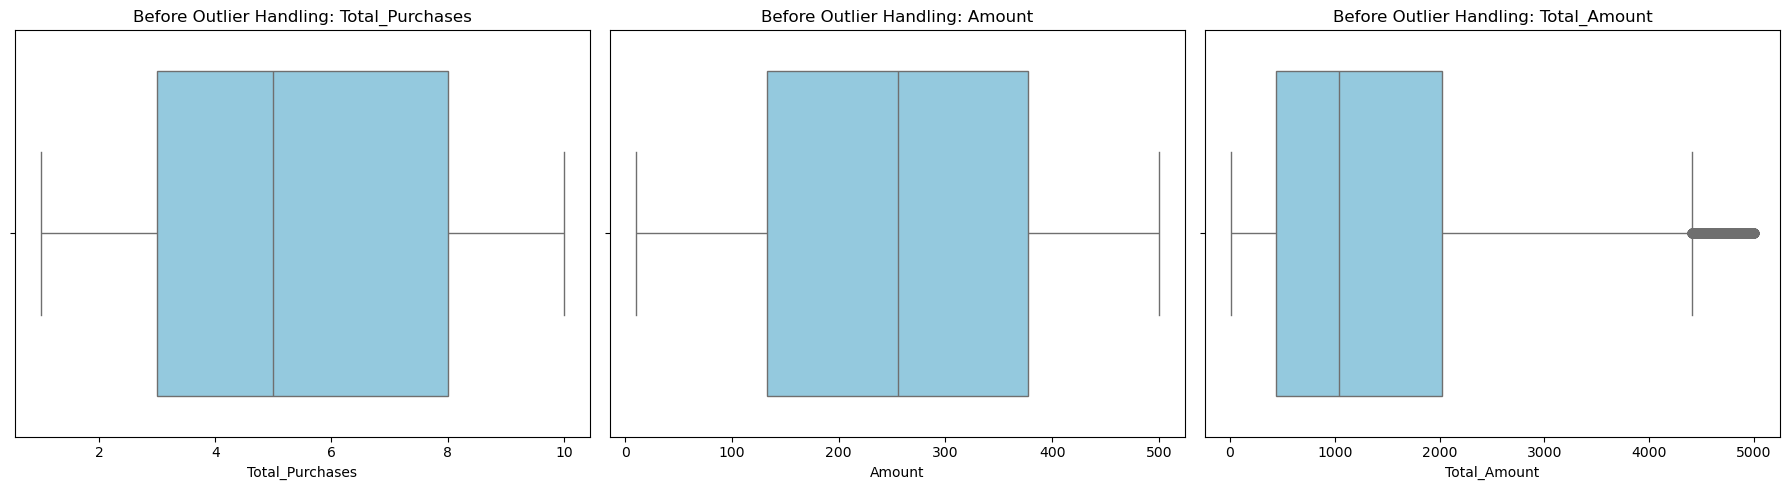

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
numeric_cols = ['Total_Purchases', 'Amount', 'Total_Amount']

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_clean[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Before Outlier Handling: {col}")
plt.tight_layout()
plt.show()

In [29]:
for col in numeric_cols:
    Q1 = df_outlier_handled[col].quantile(0.25)
    Q3 = df_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier_handled[col] = np.where(df_outlier_handled[col] > upper_bound, upper_bound,
                                       np.where(df_outlier_handled[col] < lower_bound, lower_bound, df_outlier_handled[col]))

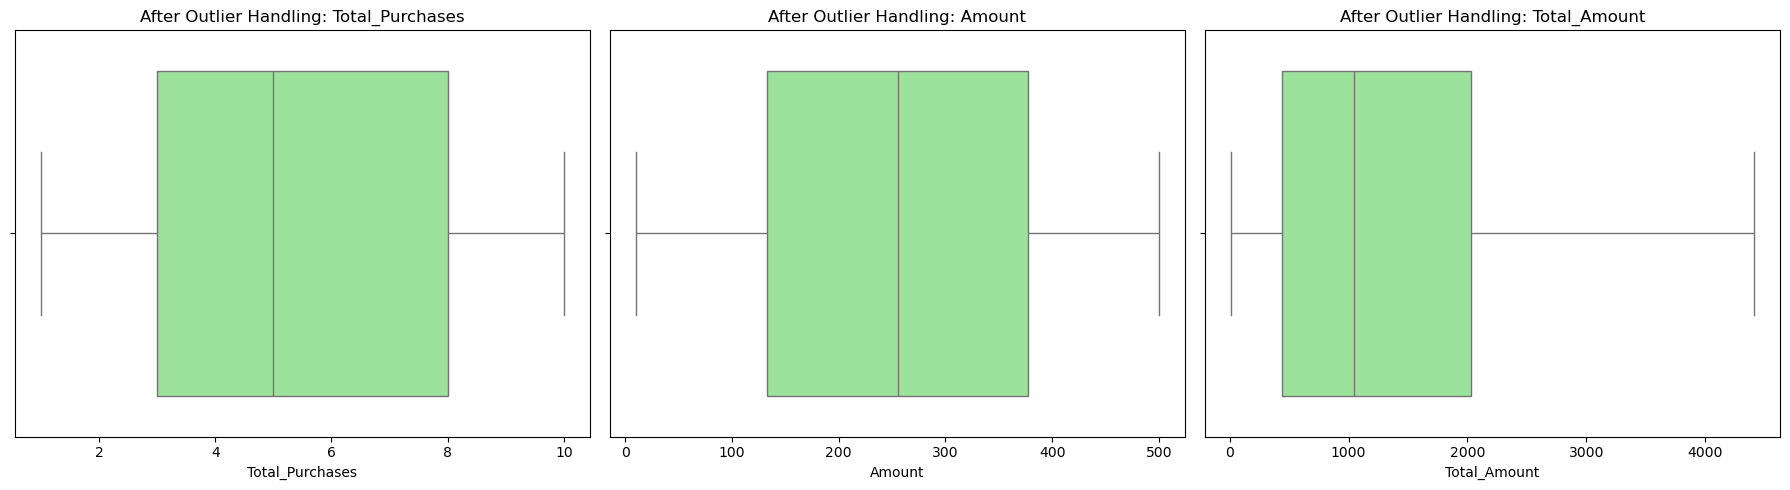

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_outlier_handled[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"After Outlier Handling: {col}")
plt.tight_layout()
plt.show()

In [31]:
df_compare = df_clean[numeric_cols].describe().T[['min','25%','50%','75%','max']]
df_compare_after = df_outlier_handled[numeric_cols].describe().T[['min','25%','50%','75%','max']]

print("\n Statistik Sebelum Capping:")
display(df_compare)
print("\n Statistik Setelah Capping:")
display(df_compare_after)



 Statistik Sebelum Capping:


,min,25%,50%,75%,max
Total_Purchases,1.000000,3.000000,5.000000,8.000000,10.000000
Amount,10.000219,133.034400,255.478976,377.516106,499.997911
Total_Amount,10.003750,439.356827,1041.174553,2027.864025,4999.625796



 Statistik Setelah Capping:


,min,25%,50%,75%,max
Total_Purchases,1.000000,3.000000,5.000000,8.000000,10.000000
Amount,10.000219,133.034400,255.478976,377.516106,499.997911
Total_Amount,10.003750,439.356827,1041.174553,2027.864025,4410.624821


### Visualisasi